In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

import os
print(os.getcwd())


C:\Users\mykhailo.zaika\Documents\PythonProjects\CV_lessons\CV_lessons_Homeworks\Lesson3


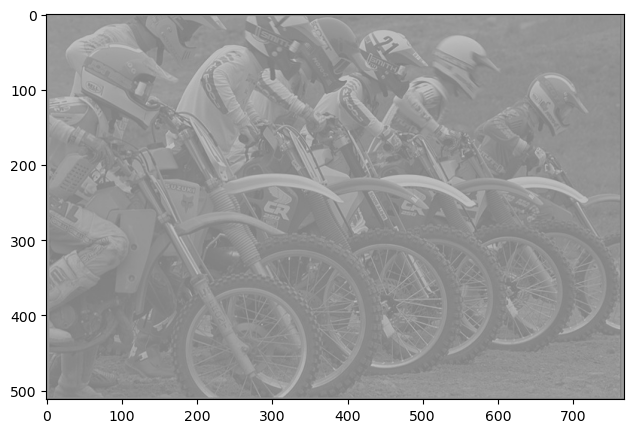

In [2]:
img = cv2.imread('source\\kodim05.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

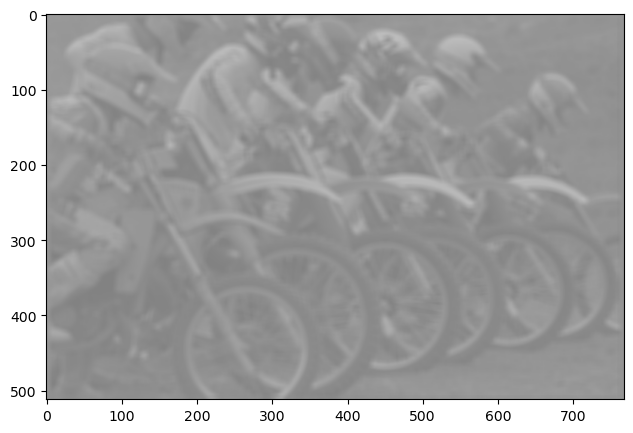

In [3]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, (9, 9), 10.0)
plt.imshow(unsharp)
plt.show() 

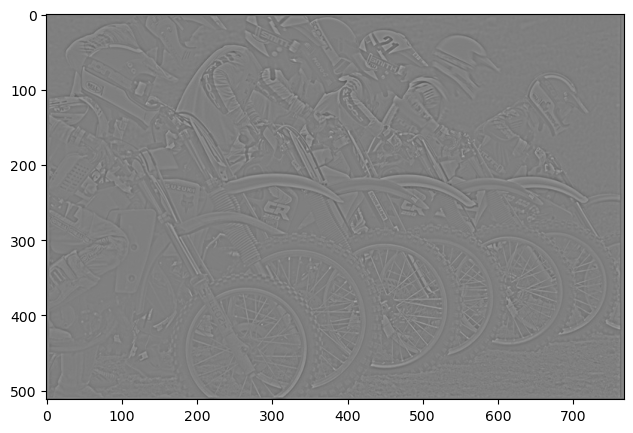

In [4]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
#diff = cv2.subtract(img.astype(np.float32), unsharp.astype(np.float32))
diff = img.astype(np.float32) - unsharp.astype(np.float32)
#plt.imshow(diff + 128)  # Normalize for visualization - не працює
plt.imshow(diff / 255.0 + 0.5)  # Normalize for visualization
plt.show()

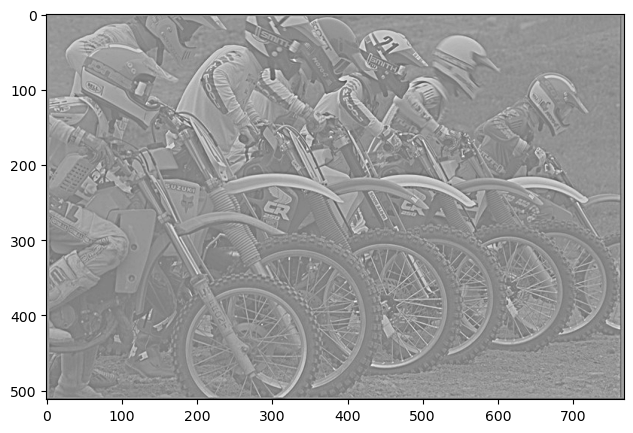

In [5]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened = img.astype(np.float32) + diff * 1.5
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)  # Clip values to valid range and convert back to uint8
plt.imshow(sharpened)
plt.show()